<a href="https://colab.research.google.com/github/Priyadarshini-yadav13/Mini-Project-Face-Emotion-Recognition-using-Deep-Learning/blob/main/Miniproject_face_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mini Project: Face Emotion Recognition using Deep Learning
Problem Statement:
This project aims to develop a deep learning model that can recognize emotions from facial expressions in images. Using a convolutional neural network (CNN), the task is to classify facial expressions into different emotional categories such as "Happy," "Sad," "Angry," "Surprised," and others. The goal is to build an emotion recognition system that can accurately predict emotions from facial images.
Dataset Link:
 The FER-2013 Dataset (Facial Expression Recognition)
Project Requirements:
Python Libraries:


tensorflow or keras for building the model.


opencv or PIL for image preprocessing.


matplotlib for visualizations.


numpy and pandas for data manipulation.


Model Architecture:


Use Convolutional Neural Networks (CNN) for feature extraction from images.


Apply data augmentation techniques to improve model generalization.


Implement a classifier that will output one of the emotion classes.







Project Steps:
1. Data Understanding and Preprocessing:
Objective:
Understand the dataset structure and prepare it for training.
Task:
Load the dataset and explore its structure (e.g., number of classes, image resolution, and labels).


Perform data preprocessing:


Resize the images to a uniform size.


Normalize the pixel values to scale the images to a range of [0, 1].


Split the dataset into training, validation, and test sets.


Perform data augmentation (e.g., rotation, zoom, flip) to improve model robustness.
2. Model Construction:
Objective:
Build and compile a Convolutional Neural Network (CNN) for emotion recognition.
Task:
Design a CNN model that will process the images and predict one of the emotional categories.


Use convolutional layers, max-pooling, and dropout for regularization.


Add a fully connected layer before the output layer.


Output layer: Softmax activation function for multi-class classification.


Compile the model using categorical_crossentropy loss function and accuracy metric.




3. Model Training and Evaluation:
Objective:
Train the model on the training data and evaluate its performance.
Task:
Train the model using the training dataset and validate it using the validation dataset.


Use EarlyStopping to avoid overfitting.


Evaluate the model using test data and report accuracy and loss.


Plot training and validation loss/accuracy curves to monitor training progress.


4. Model Optimization:
Objective:
Improve the model performance.
Task:
Experiment with different CNN architectures (e.g., adding more layers, changing kernel sizes, adding dropout).


Tune hyperparameters such as the learning rate, batch size, and number of epochs.


Implement techniques like data augmentation, dropout, or batch normalization to improve generalization.


5. Face Emotion Prediction:
Objective:
Make predictions on new images.
Task:
Load the trained model and use it to predict the emotion on unseen images.


Preprocess the input image (resize, normalize).


Predict the emotion category using the trained CNN model.


Visualize the predicted emotion with the image.


6. Model Evaluation:
Objective:
Evaluate the performance of the model on different metrics.
Task:
Generate a confusion matrix to show how well the model predicts each emotion.


Calculate additional metrics like precision, recall, and F1-score for each class.


Report the model's overall accuracy and provide analysis of misclassified emotions.


Expected Outcomes:
Data Preprocessing:


Students will learn how to handle image datasets, resize, normalize, and augment data for deep learning models.


Deep Learning Model Development:


Students will build a CNN from scratch and train it to classify facial emotions accurately.


Model Evaluation:


Evaluate the model's performance and provide actionable insights on improving the system based on metrics like accuracy, precision, recall, and F1-score.


Prediction:


Students will understand how to deploy a trained model for real-time emotion prediction on new facial images.


In [1]:
#installing important libraries
!pip install kaggle --quiet
!pip install tensorflow matplotlib seaborn --quiet


In [2]:
#Upload your API kaggle token
kaggle_api = '/content/kaggle.json'

In [3]:
# Copy Kaggle API Key from Drive to .kaggle/
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Download FER2013 Dataset from Kaggle
!kaggle datasets download -d msambare/fer2013
!unzip -q fer2013.zip

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 94% 57.0M/60.3M [00:00<00:00, 298MB/s]
100% 60.3M/60.3M [00:00<00:00, 284MB/s]


In [5]:
# Set Up Image Data Loaders

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define paths to your training and testing data
train_data_dir = '/content/train'
test_data_dir = '/content/test'

# Define image dimensions and batch size
img_width, img_height = 48, 48  # FER2013 images are 48x48
batch_size = 32
validation_split = 0.2 # Define the validation split ratio

# Data augmentation and preprocessing for training data, including validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=validation_split) # Set the validation split

# Preprocessing for testing data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale', # FER2013 dataset is grayscale
    class_mode='categorical',
    subset='training') # Specify 'training' subset

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale', # FER2013 dataset is grayscale
    class_mode='categorical',
    subset='validation') # Specify 'validation' subset


test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale', # FER2013 dataset is grayscale
    class_mode='categorical')

# Display the class indices to understand the mapping of emotions to numbers
print("Class indices:", train_generator.class_indices)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Class indices: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [7]:
#build the CNN model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output from convolutional layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax')) # Output layer with softmax for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Display the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,687 (686.28 KB)

 Trainable params: 175,687 (686.28 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Monitor the validation loss
    patience=10,        # Number of epochs with no improvement after which training will be stopped.
    mode='min',         # The training will stop when the monitored quantity has stopped decreasing.
    verbose=1           # Prints a message when training is stopped.
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100, # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping] # Add the early stopping callback
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.2354 - loss: 1.8445

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


717/717 ━━━━━━━━━━━━━━━━━━━━ 111s 151ms/step - accuracy: 0.2354 - loss: 1.8445 - val_accuracy: 0.2514 - val_loss: 1.8059
Epoch 2/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:32 130ms/step - accuracy: 0.1875 - loss: 1.8709

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1875 - loss: 1.8709 - val_accuracy: 0.2514 - val_loss: 1.8070
Epoch 3/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 107s 149ms/step - accuracy: 0.2538 - loss: 1.8040 - val_accuracy: 0.2531 - val_loss: 1.7910
Epoch 4/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:11 100ms/step - accuracy: 0.2812 - loss: 1.8357

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.2812 - loss: 1.8357 - val_accuracy: 0.2542 - val_loss: 1.7889
Epoch 5/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 133s 151ms/step - accuracy: 0.2524 - loss: 1.7879 - val_accuracy: 0.2640 - val_loss: 1.7617
Epoch 6/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:20 112ms/step - accuracy: 0.4062 - loss: 1.8085

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4062 - loss: 1.8085 - val_accuracy: 0.2631 - val_loss: 1.7636
Epoch 7/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 142s 198ms/step - accuracy: 0.2691 - loss: 1.7727 - val_accuracy: 0.2781 - val_loss: 1.7538
Epoch 8/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:14 104ms/step - accuracy: 0.3125 - loss: 1.6022

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3125 - loss: 1.6022 - val_accuracy: 0.2725 - val_loss: 1.7552
Epoch 9/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 160s 152ms/step - accuracy: 0.2711 - loss: 1.7603 - val_accuracy: 0.2912 - val_loss: 1.7282
Epoch 10/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:14 104ms/step - accuracy: 0.1875 - loss: 1.7645

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.1875 - loss: 1.7645 - val_accuracy: 0.2865 - val_loss: 1.7332
Epoch 11/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 111s 155ms/step - accuracy: 0.2840 - loss: 1.7405 - val_accuracy: 0.3010 - val_loss: 1.7034
Epoch 12/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:23 117ms/step - accuracy: 0.3125 - loss: 1.6478

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3125 - loss: 1.6478 - val_accuracy: 0.3046 - val_loss: 1.7021
Epoch 13/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 108s 151ms/step - accuracy: 0.2979 - loss: 1.7133 - val_accuracy: 0.3101 - val_loss: 1.6841
Epoch 14/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:12 102ms/step - accuracy: 0.1562 - loss: 1.8807

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.1562 - loss: 1.8807 - val_accuracy: 0.3095 - val_loss: 1.6907
Epoch 15/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 106s 147ms/step - accuracy: 0.3099 - loss: 1.7068 - val_accuracy: 0.3132 - val_loss: 1.6717
Epoch 16/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:10 99ms/step - accuracy: 0.4375 - loss: 1.6322

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4375 - loss: 1.6322 - val_accuracy: 0.3146 - val_loss: 1.6705
Epoch 17/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 131s 145ms/step - accuracy: 0.3065 - loss: 1.6948 - val_accuracy: 0.3067 - val_loss: 1.6955
Epoch 18/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:11 99ms/step - accuracy: 0.2812 - loss: 1.5600

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2812 - loss: 1.5600 - val_accuracy: 0.3062 - val_loss: 1.6865
Epoch 19/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 142s 198ms/step - accuracy: 0.3270 - loss: 1.6694 - val_accuracy: 0.3385 - val_loss: 1.6335
Epoch 20/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 54s 75ms/step - accuracy: 0.4583 - loss: 1.6567

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4583 - loss: 1.6567 - val_accuracy: 0.3369 - val_loss: 1.6350
Epoch 21/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 156s 147ms/step - accuracy: 0.3349 - loss: 1.6564 - val_accuracy: 0.3830 - val_loss: 1.5671
Epoch 22/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:07 94ms/step - accuracy: 0.2812 - loss: 1.8150

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.2812 - loss: 1.8150 - val_accuracy: 0.3794 - val_loss: 1.5787
Epoch 23/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 108s 150ms/step - accuracy: 0.3529 - loss: 1.6273 - val_accuracy: 0.4031 - val_loss: 1.5416
Epoch 24/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:09 97ms/step - accuracy: 0.4375 - loss: 1.4199

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4375 - loss: 1.4199 - val_accuracy: 0.4007 - val_loss: 1.5391
Epoch 25/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 129s 147ms/step - accuracy: 0.3682 - loss: 1.6078 - val_accuracy: 0.4026 - val_loss: 1.5325
Epoch 26/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:08 96ms/step - accuracy: 0.3750 - loss: 1.4442

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3750 - loss: 1.4442 - val_accuracy: 0.4008 - val_loss: 1.5328
Epoch 27/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 140s 196ms/step - accuracy: 0.3753 - loss: 1.5940 - val_accuracy: 0.4083 - val_loss: 1.5060
Epoch 28/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:10 98ms/step - accuracy: 0.2812 - loss: 1.6595

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2812 - loss: 1.6595 - val_accuracy: 0.4159 - val_loss: 1.5074
Epoch 29/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 202s 209ms/step - accuracy: 0.3791 - loss: 1.5806 - val_accuracy: 0.4003 - val_loss: 1.5152
Epoch 30/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:09 97ms/step - accuracy: 0.4062 - loss: 1.4900

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4062 - loss: 1.4900 - val_accuracy: 0.4022 - val_loss: 1.5189
Epoch 31/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 147s 144ms/step - accuracy: 0.3755 - loss: 1.5718 - val_accuracy: 0.4218 - val_loss: 1.4876
Epoch 32/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:11 100ms/step - accuracy: 0.3438 - loss: 1.6110

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3438 - loss: 1.6110 - val_accuracy: 0.4190 - val_loss: 1.4859
Epoch 33/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 141s 197ms/step - accuracy: 0.3954 - loss: 1.5568 - val_accuracy: 0.4117 - val_loss: 1.5015
Epoch 34/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:09 97ms/step - accuracy: 0.3438 - loss: 1.5852

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3438 - loss: 1.5852 - val_accuracy: 0.4188 - val_loss: 1.5068
Epoch 35/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 141s 197ms/step - accuracy: 0.3872 - loss: 1.5593 - val_accuracy: 0.4239 - val_loss: 1.4722
Epoch 36/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:09 98ms/step - accuracy: 0.3125 - loss: 1.6002

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3125 - loss: 1.6002 - val_accuracy: 0.4213 - val_loss: 1.4769
Epoch 37/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 155s 144ms/step - accuracy: 0.3889 - loss: 1.5568 - val_accuracy: 0.4138 - val_loss: 1.5228
Epoch 38/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 2:00 168ms/step - accuracy: 0.3125 - loss: 1.6631

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3125 - loss: 1.6631 - val_accuracy: 0.4207 - val_loss: 1.5132
Epoch 39/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 105s 146ms/step - accuracy: 0.3983 - loss: 1.5428 - val_accuracy: 0.4286 - val_loss: 1.4824
Epoch 40/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:51 156ms/step - accuracy: 0.4375 - loss: 1.3843

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4375 - loss: 1.3843 - val_accuracy: 0.4377 - val_loss: 1.4695
Epoch 41/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 104s 145ms/step - accuracy: 0.3991 - loss: 1.5399 - val_accuracy: 0.4275 - val_loss: 1.4628
Epoch 42/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:11 99ms/step - accuracy: 0.2812 - loss: 1.7058

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2812 - loss: 1.7058 - val_accuracy: 0.4289 - val_loss: 1.4511
Epoch 43/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 142s 158ms/step - accuracy: 0.4058 - loss: 1.5307 - val_accuracy: 0.4225 - val_loss: 1.4954
Epoch 44/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:08 96ms/step - accuracy: 0.4062 - loss: 1.4733

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4062 - loss: 1.4733 - val_accuracy: 0.4232 - val_loss: 1.4860
Epoch 45/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 104s 146ms/step - accuracy: 0.4059 - loss: 1.5294 - val_accuracy: 0.4413 - val_loss: 1.4344
Epoch 46/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.3750 - loss: 1.6425

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3750 - loss: 1.6425 - val_accuracy: 0.4408 - val_loss: 1.4380
Epoch 47/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 104s 145ms/step - accuracy: 0.4015 - loss: 1.5264 - val_accuracy: 0.4436 - val_loss: 1.4307
Epoch 48/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:26 120ms/step - accuracy: 0.4375 - loss: 1.4335

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4375 - loss: 1.4335 - val_accuracy: 0.4406 - val_loss: 1.4416
Epoch 49/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 134s 145ms/step - accuracy: 0.4114 - loss: 1.5219 - val_accuracy: 0.4471 - val_loss: 1.4226
Epoch 50/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.4062 - loss: 1.3806

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4062 - loss: 1.3806 - val_accuracy: 0.4387 - val_loss: 1.4257
Epoch 51/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 142s 158ms/step - accuracy: 0.4135 - loss: 1.5126 - val_accuracy: 0.4459 - val_loss: 1.4239
Epoch 52/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:10 99ms/step - accuracy: 0.3125 - loss: 1.5890

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3125 - loss: 1.5890 - val_accuracy: 0.4494 - val_loss: 1.4224
Epoch 53/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 104s 145ms/step - accuracy: 0.4123 - loss: 1.5055 - val_accuracy: 0.4523 - val_loss: 1.4159
Epoch 54/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:10 98ms/step - accuracy: 0.4688 - loss: 1.4615

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4688 - loss: 1.4615 - val_accuracy: 0.4537 - val_loss: 1.4156
Epoch 55/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 143s 199ms/step - accuracy: 0.4265 - loss: 1.4913 - val_accuracy: 0.4565 - val_loss: 1.4200
Epoch 56/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:11 100ms/step - accuracy: 0.3438 - loss: 1.7292

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3438 - loss: 1.7292 - val_accuracy: 0.4515 - val_loss: 1.4180
Epoch 57/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 157s 148ms/step - accuracy: 0.4161 - loss: 1.4979 - val_accuracy: 0.4518 - val_loss: 1.4204
Epoch 58/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:08 96ms/step - accuracy: 0.2812 - loss: 1.4892

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.2812 - loss: 1.4892 - val_accuracy: 0.4590 - val_loss: 1.4144
Epoch 59/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 106s 148ms/step - accuracy: 0.4210 - loss: 1.4900 - val_accuracy: 0.4572 - val_loss: 1.4174
Epoch 60/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:11 99ms/step - accuracy: 0.4688 - loss: 1.4059

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4688 - loss: 1.4059 - val_accuracy: 0.4530 - val_loss: 1.4148
Epoch 61/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 142s 161ms/step - accuracy: 0.4267 - loss: 1.4933 - val_accuracy: 0.4490 - val_loss: 1.4375
Epoch 62/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:10 98ms/step - accuracy: 0.3750 - loss: 1.4590

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3750 - loss: 1.4590 - val_accuracy: 0.4508 - val_loss: 1.4224
Epoch 63/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 142s 174ms/step - accuracy: 0.4294 - loss: 1.4812 - val_accuracy: 0.4639 - val_loss: 1.3907
Epoch 64/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:14 104ms/step - accuracy: 0.4062 - loss: 1.4451

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4062 - loss: 1.4451 - val_accuracy: 0.4555 - val_loss: 1.4008
Epoch 65/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 142s 198ms/step - accuracy: 0.4290 - loss: 1.4824 - val_accuracy: 0.4647 - val_loss: 1.3931
Epoch 66/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:12 101ms/step - accuracy: 0.4688 - loss: 1.4323

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4688 - loss: 1.4323 - val_accuracy: 0.4595 - val_loss: 1.4027
Epoch 67/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 142s 198ms/step - accuracy: 0.4268 - loss: 1.4842 - val_accuracy: 0.4717 - val_loss: 1.3822
Epoch 68/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:27 122ms/step - accuracy: 0.3750 - loss: 1.4792

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3750 - loss: 1.4792 - val_accuracy: 0.4663 - val_loss: 1.3769
Epoch 69/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 153s 145ms/step - accuracy: 0.4313 - loss: 1.4737 - val_accuracy: 0.4701 - val_loss: 1.3871
Epoch 70/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:09 98ms/step - accuracy: 0.5312 - loss: 1.4481

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5312 - loss: 1.4481 - val_accuracy: 0.4665 - val_loss: 1.3894
Epoch 71/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 142s 158ms/step - accuracy: 0.4277 - loss: 1.4742 - val_accuracy: 0.4780 - val_loss: 1.3766
Epoch 72/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:13 102ms/step - accuracy: 0.4375 - loss: 1.4846

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4375 - loss: 1.4846 - val_accuracy: 0.4773 - val_loss: 1.3768
Epoch 73/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 105s 146ms/step - accuracy: 0.4379 - loss: 1.4700 - val_accuracy: 0.4544 - val_loss: 1.3964
Epoch 74/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:24 118ms/step - accuracy: 0.4375 - loss: 1.3472

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4375 - loss: 1.3472 - val_accuracy: 0.4675 - val_loss: 1.3812
Epoch 75/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 133s 144ms/step - accuracy: 0.4345 - loss: 1.4652 - val_accuracy: 0.4724 - val_loss: 1.3785
Epoch 76/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:11 99ms/step - accuracy: 0.3125 - loss: 1.5988

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3125 - loss: 1.5988 - val_accuracy: 0.4770 - val_loss: 1.3695
Epoch 77/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 142s 157ms/step - accuracy: 0.4379 - loss: 1.4694 - val_accuracy: 0.4660 - val_loss: 1.3938
Epoch 78/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:12 101ms/step - accuracy: 0.5000 - loss: 1.3271

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5000 - loss: 1.3271 - val_accuracy: 0.4756 - val_loss: 1.3863
Epoch 79/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 142s 170ms/step - accuracy: 0.4395 - loss: 1.4570 - val_accuracy: 0.4831 - val_loss: 1.3529
Epoch 80/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:14 104ms/step - accuracy: 0.5625 - loss: 1.2720

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5625 - loss: 1.2720 - val_accuracy: 0.4862 - val_loss: 1.3572
Epoch 81/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 143s 200ms/step - accuracy: 0.4308 - loss: 1.4723 - val_accuracy: 0.4729 - val_loss: 1.3806
Epoch 82/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:12 101ms/step - accuracy: 0.4688 - loss: 1.6674

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4688 - loss: 1.6674 - val_accuracy: 0.4782 - val_loss: 1.3688
Epoch 83/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 157s 149ms/step - accuracy: 0.4422 - loss: 1.4577 - val_accuracy: 0.4658 - val_loss: 1.3809
Epoch 84/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:12 101ms/step - accuracy: 0.3125 - loss: 1.4124

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3125 - loss: 1.4124 - val_accuracy: 0.4651 - val_loss: 1.3866
Epoch 85/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 108s 150ms/step - accuracy: 0.4394 - loss: 1.4545 - val_accuracy: 0.4859 - val_loss: 1.3606
Epoch 86/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:31 128ms/step - accuracy: 0.4688 - loss: 1.5751

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4688 - loss: 1.5751 - val_accuracy: 0.4846 - val_loss: 1.3638
Epoch 87/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 142s 198ms/step - accuracy: 0.4474 - loss: 1.4518 - val_accuracy: 0.4887 - val_loss: 1.3521
Epoch 88/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:11 100ms/step - accuracy: 0.5000 - loss: 1.4765

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5000 - loss: 1.4765 - val_accuracy: 0.4887 - val_loss: 1.3532
Epoch 89/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 105s 146ms/step - accuracy: 0.4397 - loss: 1.4563 - val_accuracy: 0.4855 - val_loss: 1.3435
Epoch 90/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.4062 - loss: 1.6311

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4062 - loss: 1.6311 - val_accuracy: 0.4804 - val_loss: 1.3544
Epoch 91/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 104s 145ms/step - accuracy: 0.4391 - loss: 1.4556 - val_accuracy: 0.4862 - val_loss: 1.3472
Epoch 92/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:59 166ms/step - accuracy: 0.4375 - loss: 1.4309

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4375 - loss: 1.4309 - val_accuracy: 0.4859 - val_loss: 1.3493
Epoch 93/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 142s 198ms/step - accuracy: 0.4492 - loss: 1.4411 - val_accuracy: 0.4904 - val_loss: 1.3392
Epoch 94/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 2:00 168ms/step - accuracy: 0.3750 - loss: 1.4881

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3750 - loss: 1.4881 - val_accuracy: 0.4983 - val_loss: 1.3394
Epoch 95/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 141s 197ms/step - accuracy: 0.4398 - loss: 1.4513 - val_accuracy: 0.4708 - val_loss: 1.3784
Epoch 96/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 2:01 169ms/step - accuracy: 0.5000 - loss: 1.2529

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5000 - loss: 1.2529 - val_accuracy: 0.4701 - val_loss: 1.3730
Epoch 97/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 104s 145ms/step - accuracy: 0.4396 - loss: 1.4476 - val_accuracy: 0.4729 - val_loss: 1.3729
Epoch 98/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:10 99ms/step - accuracy: 0.3438 - loss: 1.5420

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3438 - loss: 1.5420 - val_accuracy: 0.4852 - val_loss: 1.3670
Epoch 99/100
717/717 ━━━━━━━━━━━━━━━━━━━━ 135s 147ms/step - accuracy: 0.4399 - loss: 1.4509 - val_accuracy: 0.4843 - val_loss: 1.3511
Epoch 100/100
  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:11 99ms/step - accuracy: 0.5625 - loss: 1.1334

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


717/717 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5625 - loss: 1.1334 - val_accuracy: 0.4794 - val_loss: 1.3628


#  Evaluate on Test Data


In [10]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5256 - loss: 1.2296
Test Accuracy: 0.5273


# Plot Training and Validation Metrics

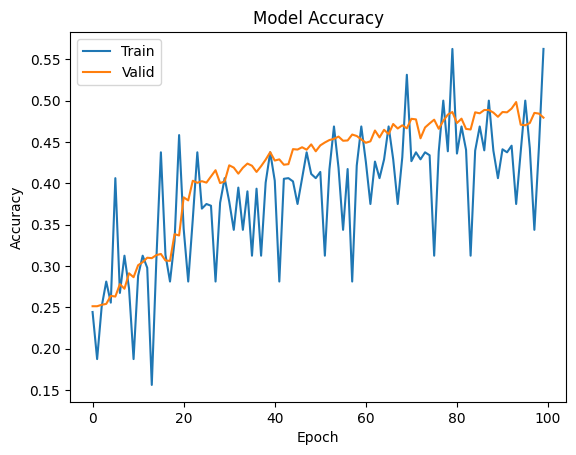

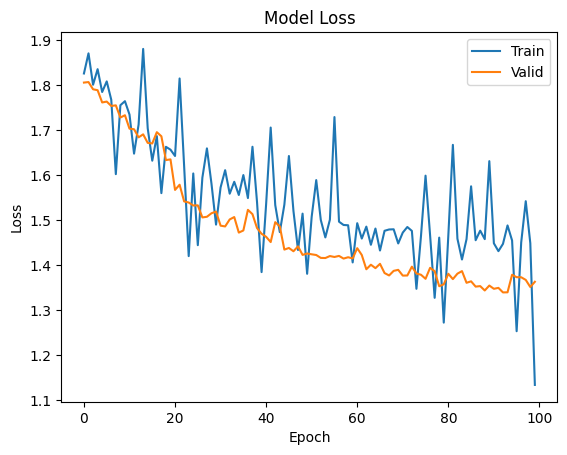

In [11]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Valid')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#  Inference on a single image

In [12]:
class_labels = list(train_generator.class_indices.keys())

In [13]:
class_labels

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [15]:
import os

def predict_emotion(img_path):
    # Get actual class name from file path
    actual_label = os.path.basename(os.path.dirname(img_path))

    # Load and preprocess image
    img = image.load_img(img_path, color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]

    # Display image with actual & predicted label
    plt.imshow(img_array[0].squeeze(), cmap='gray')
    plt.title(f"Actual: {actual_label.capitalize()} | Predicted: {predicted_label.capitalize()}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


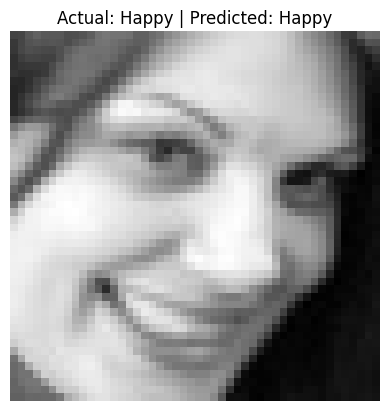

In [16]:
predict_emotion("/content/test/happy/PrivateTest_13103594.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


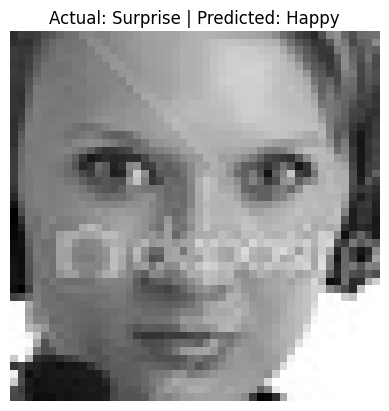

In [17]:
predict_emotion("/content/test/surprise/PrivateTest_13683211.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


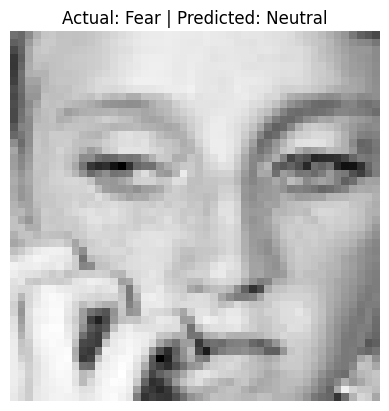

In [18]:
predict_emotion("/content/test/fear/PrivateTest_11014592.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


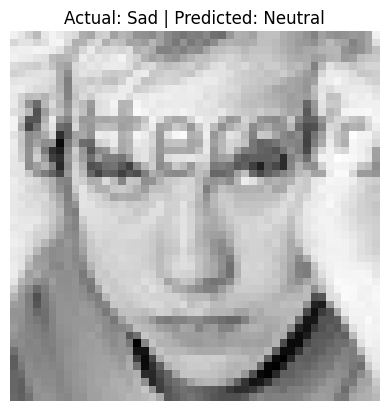

In [19]:
predict_emotion("/content/test/sad/PrivateTest_10814167.jpg")